Importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

Reading data and some EDA

In [2]:
# Load the dataset
data = pd.read_csv("C:/Users/Divine/Downloads/Medical Price Dataset.csv")
# Summary statistics
summary_stats = data.describe()
print(summary_stats)

               age          bmi     children       charges
count  1338.000000  1338.000000  1338.000000   1338.000000
mean     39.207025    30.663397     1.094918  13270.422265
std      14.049960     6.098187     1.205493  12110.011237
min      18.000000    15.960000     0.000000   1121.873900
25%      27.000000    26.296250     0.000000   4740.287150
50%      39.000000    30.400000     1.000000   9382.033000
75%      51.000000    34.693750     2.000000  16639.912515
max      64.000000    53.130000     5.000000  63770.428010


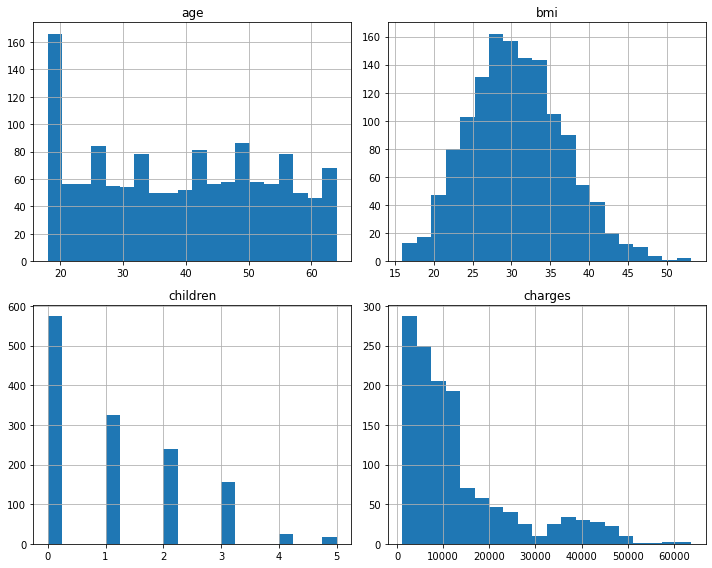

In [3]:
#Distribution plots
data[['age', 'bmi', 'children', 'charges']].hist(bins=20, figsize=(10, 8))
plt.tight_layout()
plt.show()

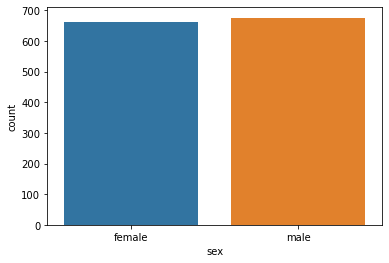

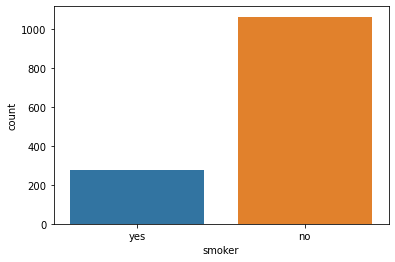

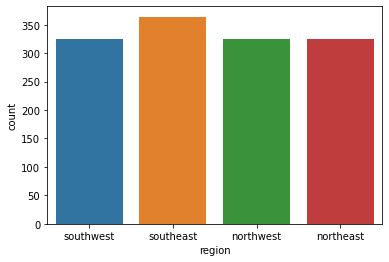

In [4]:
# Bar plots
sns.countplot(x='sex', data=data)
plt.show()

sns.countplot(x='smoker', data=data)
plt.show()

sns.countplot(x='region', data=data)
plt.show()

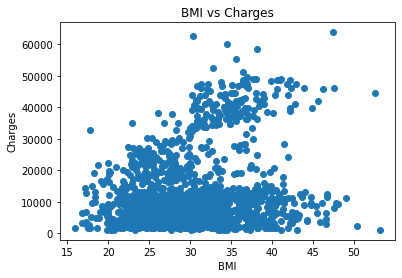

In [5]:
#Scatter plot
plt.scatter(data['bmi'], data['charges'])
plt.xlabel('BMI')
plt.ylabel('Charges')
plt.title('BMI vs Charges')
plt.show()


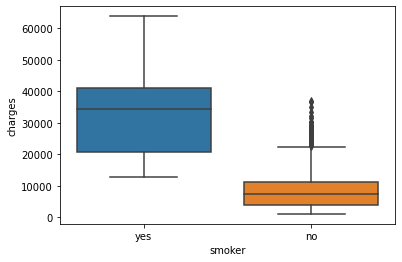

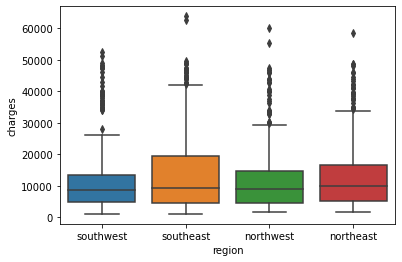

In [6]:
#Box plot
sns.boxplot(x='smoker', y='charges', data=data)
plt.show()

sns.boxplot(x='region', y='charges', data=data)
plt.show()


Data preprocessing (One-hot encoding and Normalization)

In [7]:
data_encoded = pd.get_dummies(data, columns=['sex', 'region', 'children', 'smoker'])

# Split the dataset into features (X) and target variable (y)
X = data_encoded.drop('charges', axis=1).values
y = data_encoded['charges'].values
#normalize
X = (X - np.mean(X, axis=0)) / np.std(X, axis=0)

Building Linear Regression from Scratch

In [8]:
class LinearRegression:
    def __init__(self, learning_rate=0.01, num_iterations=1000):
        self.learning_rate = learning_rate
        self.num_iterations = num_iterations
        self.weights = None
        self.bias = None

    def fit(self, X, y):
        num_samples, num_features = X.shape

        # Initialize the weights and bias
        self.weights = np.zeros(num_features)
        self.bias = 0

        # Gradient Descent
        for _ in range(self.num_iterations):
            # Calculate the predicted values
            y_pred = self.predict(X)

            # Compute the gradients
            dw = (1 / num_samples) * np.dot(X.T, (y_pred - y))
            db = (1 / num_samples) * np.sum(y_pred - y)

            # Update the parameters
            self.weights -= self.learning_rate * dw
            self.bias -= self.learning_rate * db

    def predict(self, X):
        return np.dot(X, self.weights) + self.bias

Training and Testing model

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
model = LinearRegression(learning_rate=0.01, num_iterations=1000)
model.fit(X_train, y_train)

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

Model Evaluation

In [10]:
# Evaluate the model
train_rmse = np.sqrt(mean_squared_error(y_train, y_pred_train))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred_test))
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Train RMSE: {train_rmse:.2f}")
print(f"Test RMSE: {test_rmse:.2f}")
print(f"Train R^2 Score: {train_r2:.2f}")
print(f"Test R^2 Score: {test_r2:.2f}")

Train RMSE: 6087.94
Test RMSE: 5810.03
Train R^2 Score: 0.74
Test R^2 Score: 0.78
